# Session 4

- Handling text data
- RegEx
- Dates and times and timeseries data

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
datapath = Path('data')

In [ ]:
# Example dateset
import seaborn as sns
tips = sns.load_dataset("tips")
# reading the dataset
red = pd.read_csv(datapath / Path('winequality-red.csv'), sep=';')

# Correlation

Correlation is a statistical measure of dependence between two variables. It shows if there is a statistical relationship between them. It is very important to note that correlation doesn't indicate causation. The amount of icecream sold in Boston is correlated to number of people rescued by the coast guard from swimming accidents in the ocean. But neither is causing the other.

There are many different relationships two variables might have. The simplest one is a linear relationship between the two variables.

This correlation is measured by the Pearson correlation coefficient. The coefficient is a number between -1 and 1 with:

- -1 indicating a perfect inverse correlation - when one variable goes up the other one goes down
- 0 indicating no correlation
- 1 indicating a perfect direct correlation - when one variable goes up the other does as well

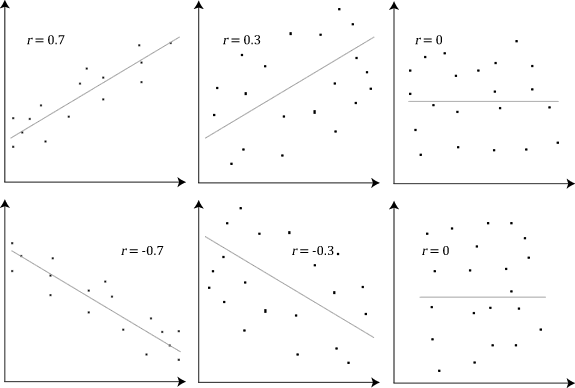

The correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom).

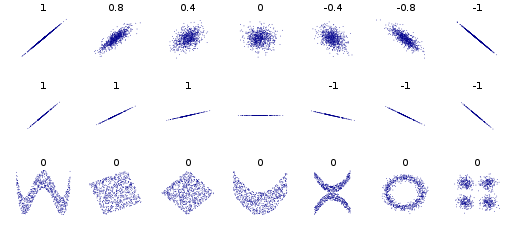

Also keep in mind that looking at descriptive statistics alone can give a very wrong picture and visual inspection is always needed.

The following graphic is known as Anscombe's quartet and shows four sets of data with the same correlation of 0.816 but very different distributions.

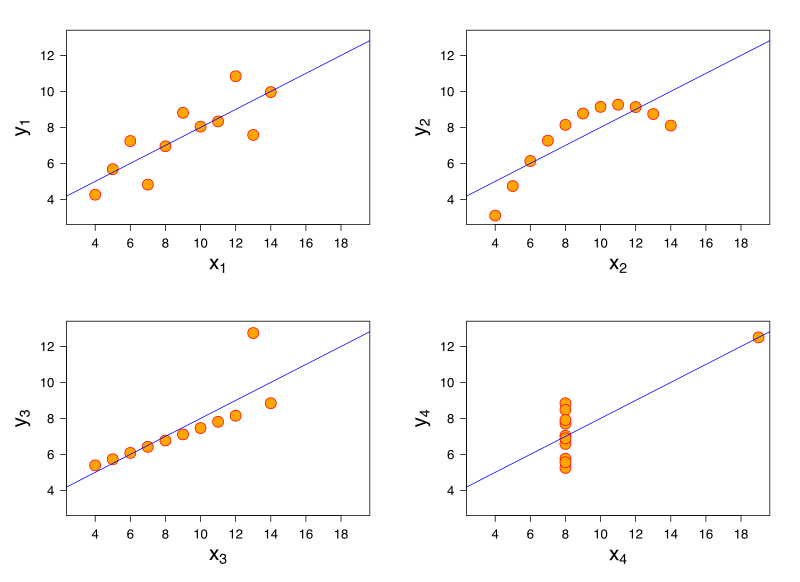

## Calculation

The Pearson correlation coefficient can be calculated using the `corr()` method in Pandas.

In [66]:
correlations = tips.corr()
correlations

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [68]:
correlations = red.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Heatmap

As correlation matrices like above often are a big bunch of numbers and make it hard to see the important ones they are often displayed in a heatmap.


<AxesSubplot: >

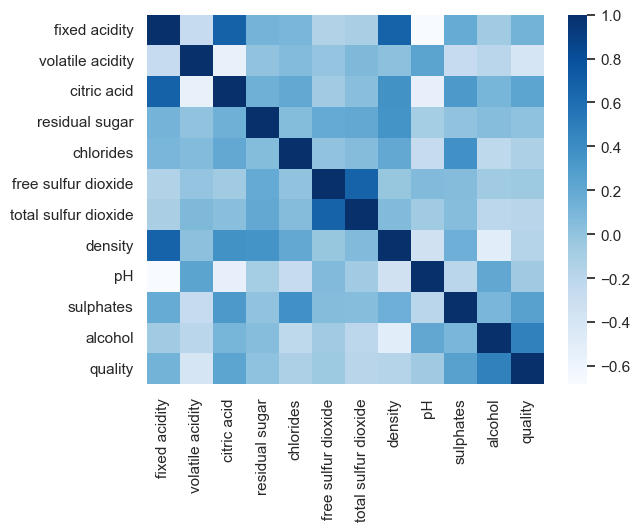

In [206]:
sns.heatmap(red.corr(),
            cmap='Blues',
            annot=False)

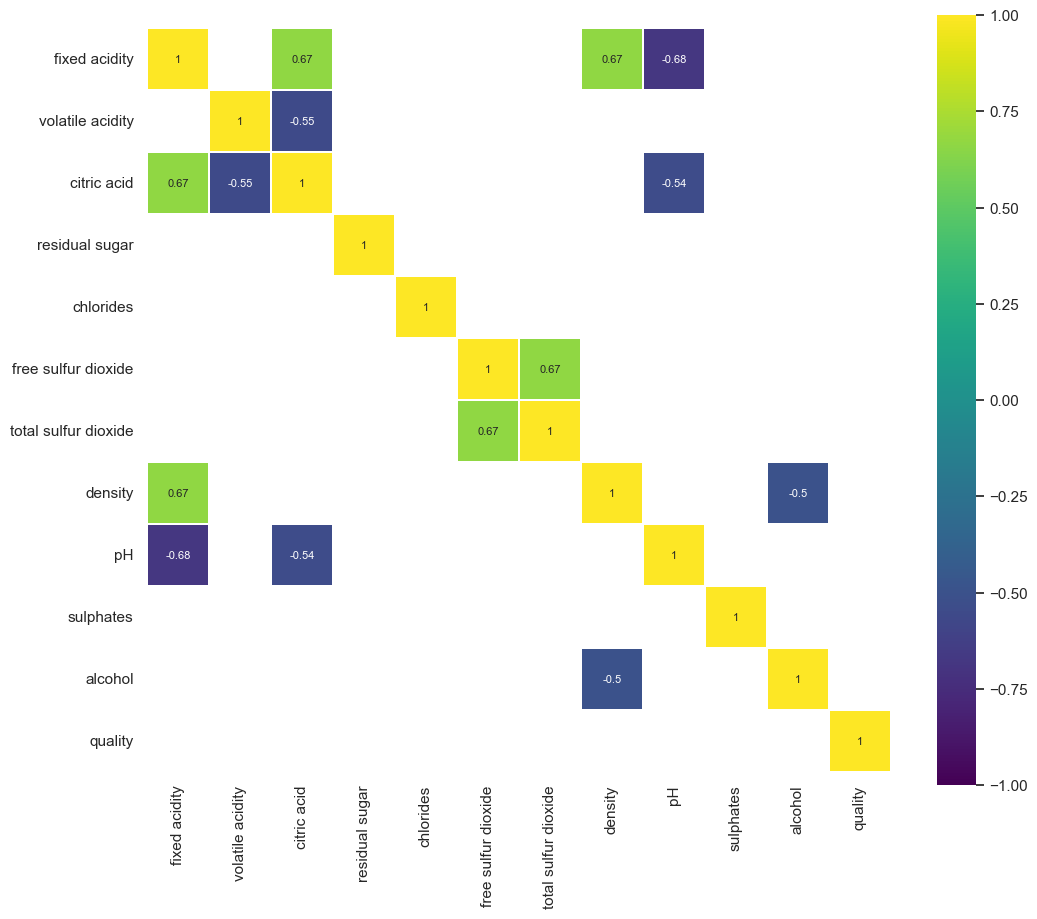

In [74]:
import matplotlib.pyplot as plt

corr = red.corr()
plt.figure(figsize=(12, 10))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 10},
            square=True);

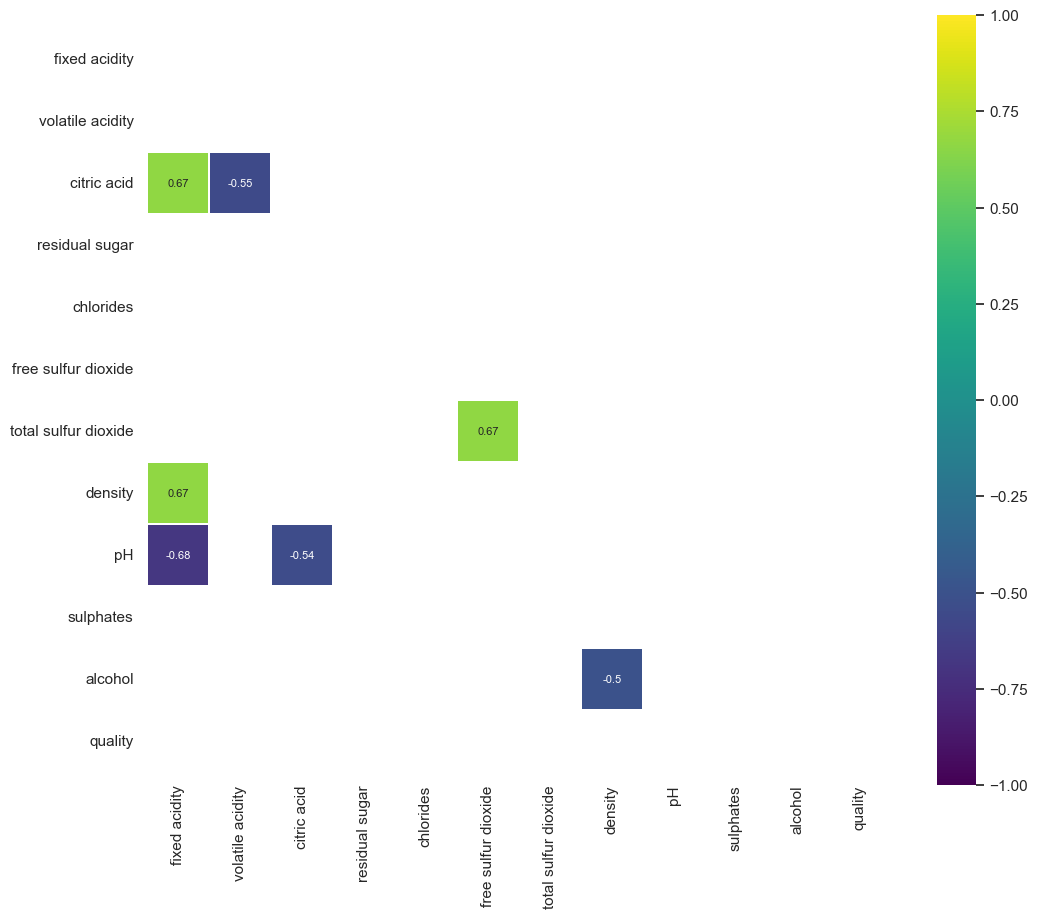

In [75]:
import matplotlib.pyplot as plt

corr = red.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 10},
            square=True);

## Further analyse the strongly correlated features

As mentioned above a visual analysis of the strongly correlated features is needed.

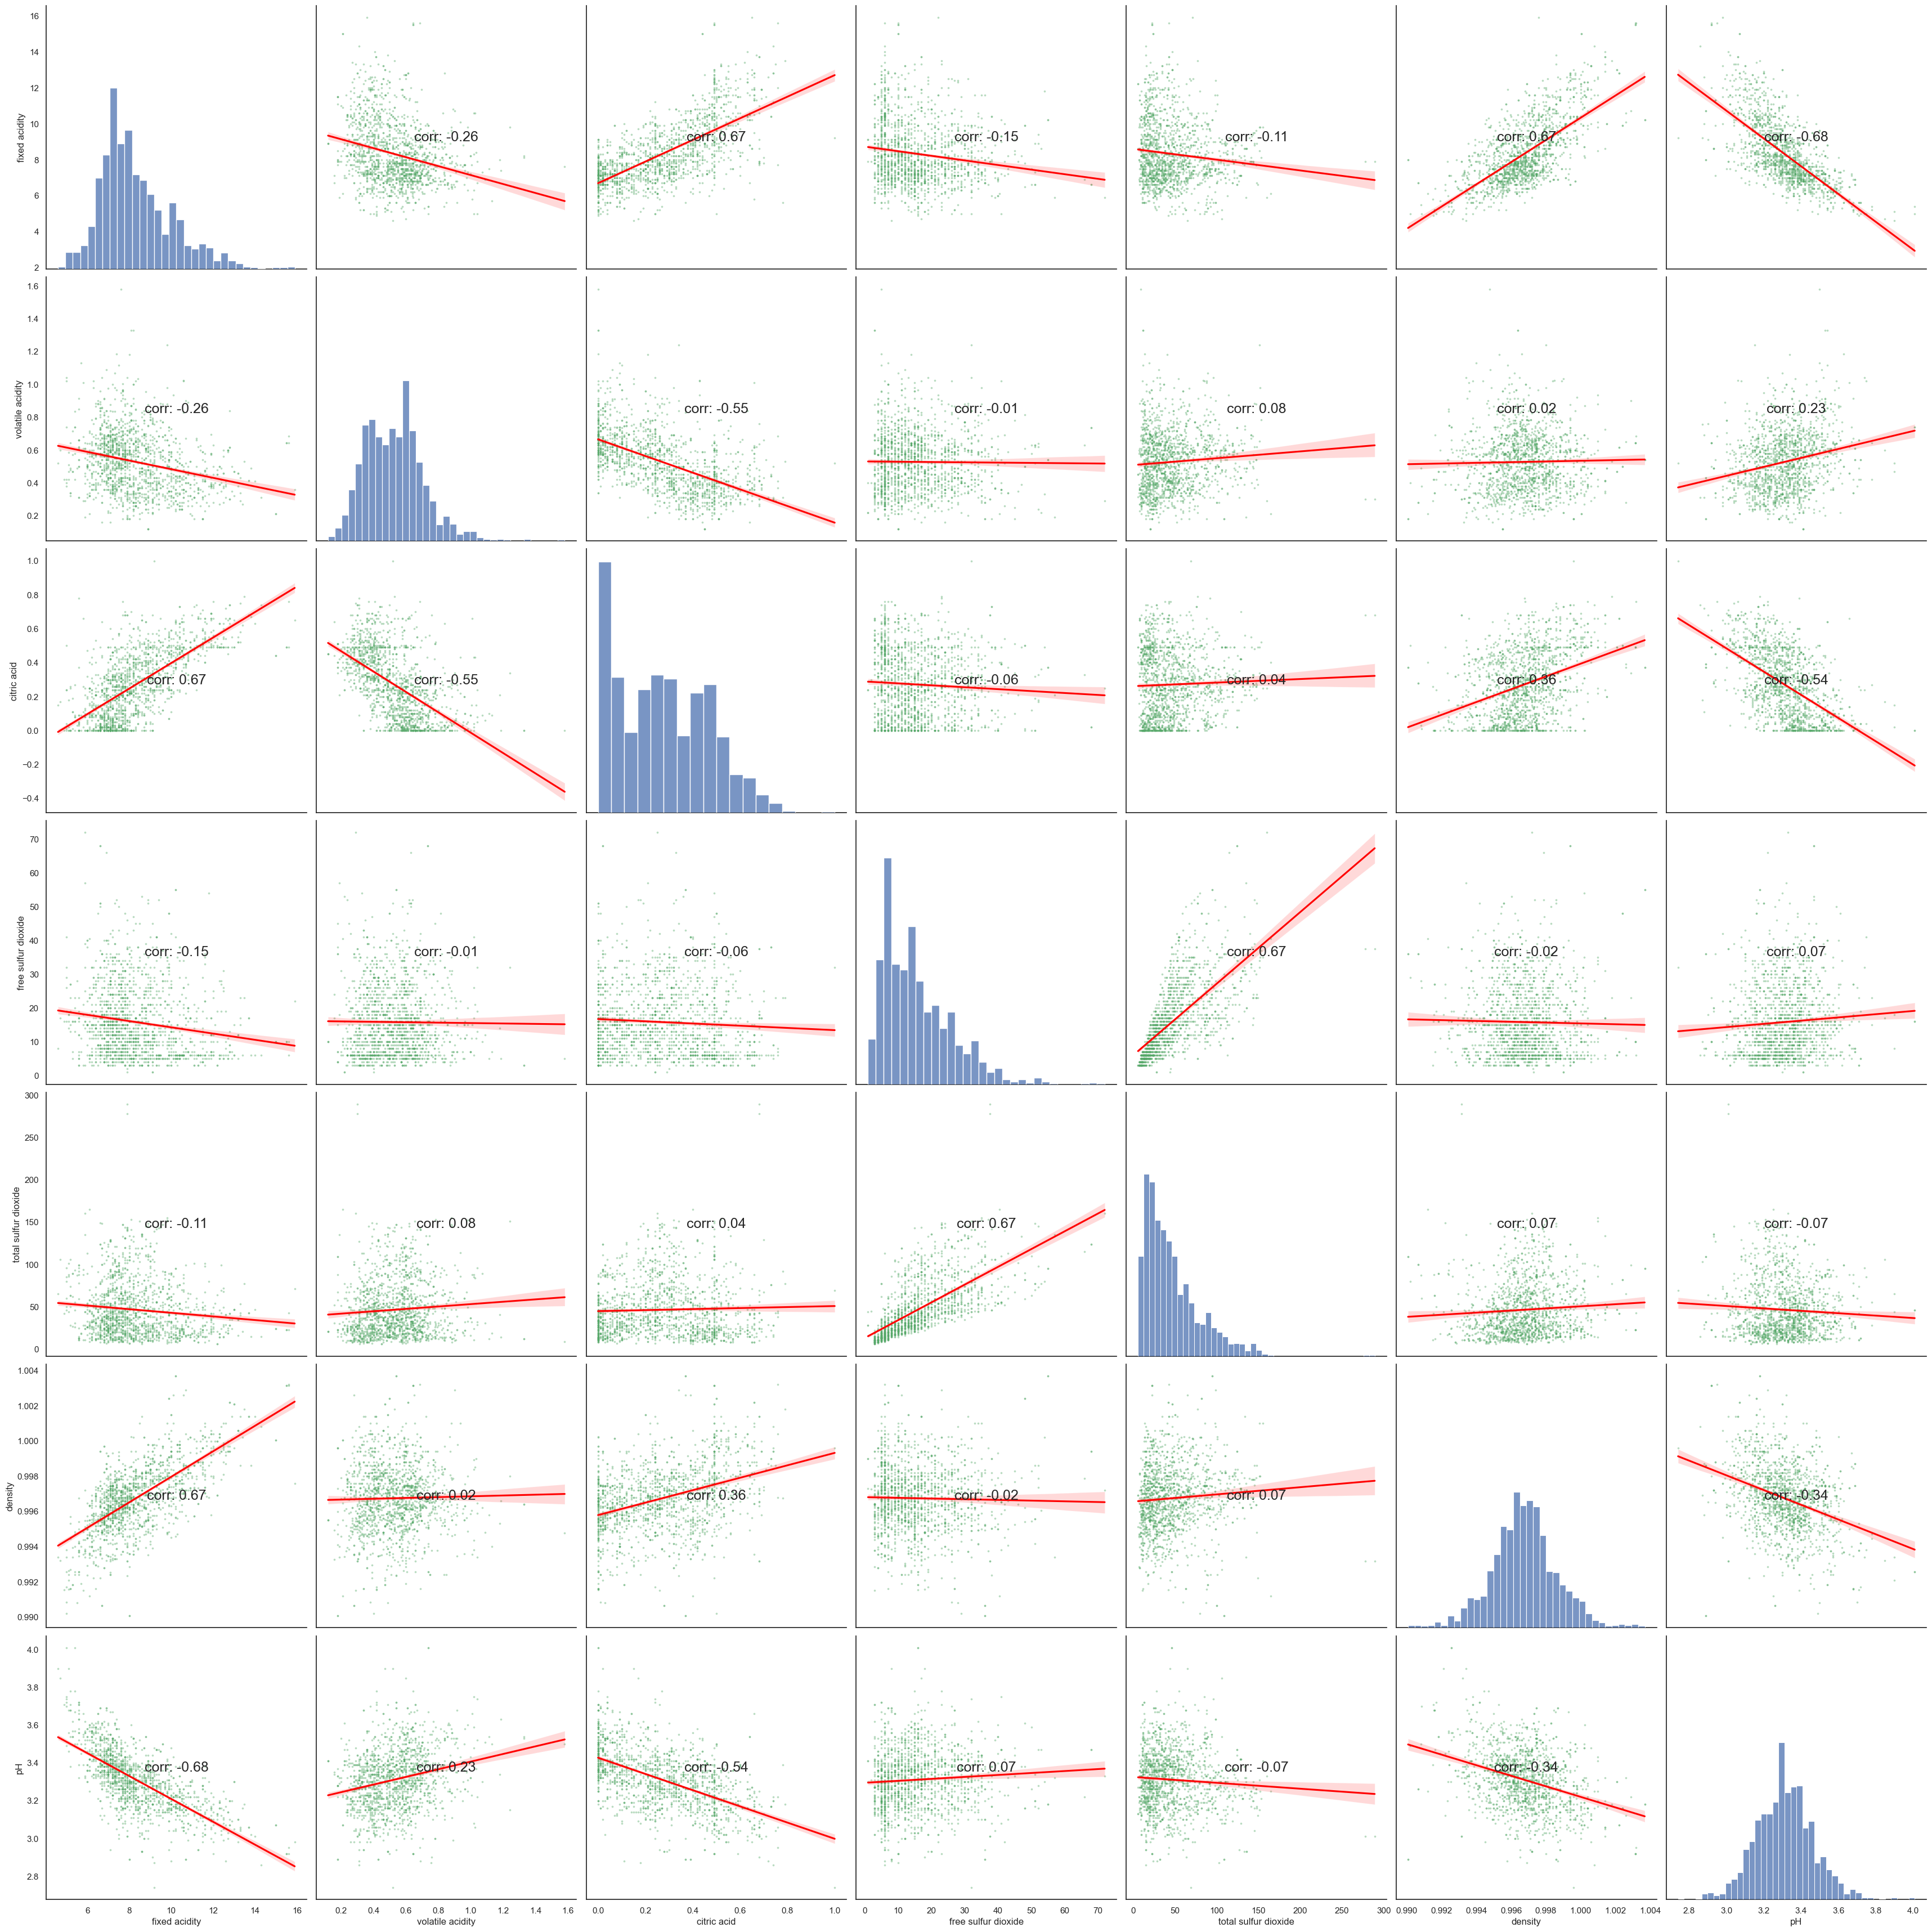

In [204]:
correlations = red.corr()

# Select only the columns with a high correlation
corr_threshold = 0.5

corr_features = red.corr()[(
    (correlations >= corr_threshold) | 
    (correlations <= -corr_threshold)) & 
    (correlations != 1.0)]
variables = corr_features.loc[corr_features.sum() != 0.0,
                              corr_features.sum() != 0.0].columns

# plot the regression plots for those
plot = sns.pairplot(data=red[variables],
                    kind='reg',
                    plot_kws=dict(scatter_kws = {'color': 'g',
                                                 'alpha': 0.3,
                                                 's': 3},
                                  line_kws = {'color': 'red'}),
                    height=5)

# Annotate with the correlation values
for i in range(len(plot.axes)):
    for j in range(len(plot.axes[i])):
        # For the diogonal there are not always labels - skip those
        if i!=j:
            y_label = plot.axes[i][j].get_ylabel()
            x_label = plot.axes[i][j].get_xlabel()
            plot.axes[i][j].text(0.5,
                                 0.5,
                                 f"corr: {correlations.loc[x_label, y_label]:.2f}",
                                 size=18,
                                 ha='center',
                                 va='center',
                                 # use position relative to axes
                                 transform=plot.axes[i][j].transAxes)

# Anomaly detection and treatment

## Outliers

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are defined as outliers.

While sometimes these outliers are very important for the analysis for modelling purposes they should usually be removed. For this there are multiple approaches:

- Trimming: It excludes the outlier values from the dataset. The main advantage is its fastest nature. Datasets with many outliers loose many datapoints.

- Capping: In this technique, outlier data is capped and set to a limit. For Example, if you’re working on the income feature, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

- Treat outliers as a missing value: By assuming outliers as the missing observations, treat them accordingly i.e, same as those of missing values.

## Missing values

Missing or NaN values in a dataset can cause problems. There are a couple common ways to deal with them:

- Delete the observations: If there is a large number of observations in the dataset, where all the classes to be predicted are sufficiently represented try deleting the missing value observations, which would not bring significant change.

- Replace missing values with the most frequent value: You can always impute them based on Mode in the case of categorical variables, just make sure you don’t have highly skewed class distributions. If there is a high number of missing values in a feature this leads to pseudo-information.

- Develop a model to predict missing values: One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

Always pay attention on the assumptions you are making by treating missing values a certain way.

## Strings

As you recall a String in Python is just a series of characters. You can subset them using the normal index based subsettign methods.

In [6]:
s = 'Hult'
s[0]

'H'

In [7]:
s[-1]

't'

In [8]:
s[1:3]

'ul'

In [11]:
# Getting the last character
s[len(s)-1]

't'

In [12]:
# Getting every other character
s[::2]

'Hl'

### String methods

| Method | Description |
|---|---|
|`.capitalize()` | Capitalizes the first character |
|`.count()` | Counts the number of occurances of a string within another |
|`.startswith()`, `.endswith()` | True if the string begins/ends with a specified string |
|`.find()` | Smallest index where the string matches, -1 if no match |
|`.isalpha()` | True is all characters are alphabetic |
|`.isdecimal()` | True if all characters are decimal numbers |
|`.isalnum()` | True if all characters are alphanumerical |
|`.lower()`, `.upper()` | Returns a copy of the string with all lower-/uppercase |
|`.strip()` | Removes leading and trailing whitespaces |
|`.split()` | Returns a list of values split by a deliminator |

In [13]:
'Hult'.upper()

'HULT'

In [14]:
'Data Analytics'.split(' ')

['Data', 'Analytics']

You can join Strings together using the `.join()` method. You use it on the String that should become the new separator between the parts.

In [16]:
' '.join(['Hult', 'data', 'analytics', 'program'])

'Hult data analytics program'

In [17]:
','.join(['Hult', 'data', 'analytics', 'program'])

'Hult,data,analytics,program'

In [18]:
''.join(['Hult', 'data', 'analytics', 'program'])

'Hultdataanalyticsprogram'

## RegEx

See RegEx.ipynb


## Text Data

Very often we have to work on data in text form. Let's explore this based on a dataset holding reddit data (https://www.kaggle.com/datasets/mswarbrickjones/reddit-selfposts?resource=download)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(datapath/Path('rspct.tsv.zip'), sep='\t')

In [3]:
df.head()

,id,subreddit,title,selftext
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi..."
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1013000 non-null  object
 1   subreddit  1013000 non-null  object
 2   title      1013000 non-null  object
 3   selftext   1013000 non-null  object
dtypes: object(4)
memory usage: 30.9+ MB


It is already obvious that the data needs some cleaning to be useful.

In [5]:
#looking at one example text
t = df.iloc[0]['selftext']
t

'Hi there,  <lb>The usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...<lb><lb>Alright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.<lb><lb>I work with $dev who helps to produce software with me. We use $PopularVersionControl.<lb><lb>We\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.<lb><lb>&gt; $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  <lb>&gt; $dev: "sure, one second."<lb><lb>Five minutes later...<lb><lb>&gt; $dev: "[CurseWords] I want beta1 to die!"  <lb>&gt; $me: "What happened?"<lb><lb>Lots of removed dialog where $dev explains what he did...<lb><lb>&gt; $me: "Did you try $PopularVersionControl with -u?"  <lb>&gt; $dev: "[Cursing] That would be why!"<lb><lb>In short. Always check your command line switches...They are important!<

It is clear that the text contains html tags which need to be replaced.

In [6]:
import re

# Recreate line endings
t = t.replace(r'<lb>', "\n")
t = re.sub(r'<br */*>', "\n", t)
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n&gt; $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n&gt; $dev: "sure, one second."\n\nFive minutes later...\n\n&gt; $dev: "[CurseWords] I want beta1 to die!"  \n&gt; $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n&gt; $me: "Did you try $PopularVersionControl with -u?"  \n&gt; $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [7]:
# replace &lt; with <, &gt; with > and &amp; with &
t = t.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n> $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n> $dev: "sure, one second."\n\nFive minutes later...\n\n> $dev: "[CurseWords] I want beta1 to die!"  \n> $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: "Did you try $PopularVersionControl with -u?"  \n> $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [60]:
# as there are some double endings this needs to be repeated
t = t.replace("&amp;", "&")

In [61]:
# remove URLs
t = re.sub(r'\(*https*://[^\)]*\)*', "", t)
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n> $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n> $dev: "sure, one second."\n\nFive minutes later...\n\n> $dev: "[CurseWords] I want beta1 to die!"  \n> $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: "Did you try $PopularVersionControl with -u?"  \n> $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [62]:
# Remove additional markdown
t = re.sub(r'\*', '', t)
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n> $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n> $dev: "sure, one second."\n\nFive minutes later...\n\n> $dev: "[CurseWords] I want beta1 to die!"  \n> $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: "Did you try $PopularVersionControl with -u?"  \n> $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [64]:
# Remove underscores
t = re.sub(r'_+', ' ', t)
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n> $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n> $dev: "sure, one second."\n\nFive minutes later...\n\n> $dev: "[CurseWords] I want beta1 to die!"  \n> $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: "Did you try $PopularVersionControl with -u?"  \n> $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [65]:
# Remove multiple quotes
t = re.sub(r'"+', '"', t)
t

'Hi there,  \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn\'t the right place...\n\nAlright. Here\'s the story. I\'m an independent developer who produces my own software. We\'re going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe\'re trying to remove a branch that was created by mistake.  The branch is beta1. We want just beta.\n\n> $me: "$dev, can you rename that branch because we\'re going to use just two. I don\'t want to keep up with 80 quintilian branches."  \n> $dev: "sure, one second."\n\nFive minutes later...\n\n> $dev: "[CurseWords] I want beta1 to die!"  \n> $me: "What happened?"\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: "Did you try $PopularVersionControl with -u?"  \n> $dev: "[Cursing] That would be why!"\n\nIn short. Always check your command line switches...They are important!\n'

In [8]:
# put it all together in a function
def clean_t(t):
    # Recreate line endings
    t = t.replace(r'<lb>', "\n")
    t = re.sub(r'<br */*>', "\n", t)
    # replace &lt; with <, &gt; with > and &amp; with &
    t = t.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    # as there are some double endings this needs to be repeated
    t = t.replace("&amp;", "&")
    # remove URLs
    t = re.sub(r'\(*https*://[^\)]*\)*', "", t)
    # Remove additional markdown
    t = re.sub(r'\*', '', t)
    # Remove underscores
    t = re.sub(r'_+', ' ', t)
    # Remove multiple quotes
    t = re.sub(r'"+', '"', t)
    return t

In [9]:
# apply it to the Dataframe
df['selftext_clean'] = df['selftext'].apply(clean_t)

In [10]:
df.head()

,id,subreddit,title,selftext,selftext_clean
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi...","Hi there, \nThe usual. Long time lerker, firs..."
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...,Did he ever say what his addiction was or is h...
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,Funny story. I went to college in Las Vegas. T...
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...,I know this is a sub for the 'Ring Doorbell' b...
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,...","Prime95 (regardless of version) and OCCT both,..."


## Dates and times

In many cases date and time information is a crucial part of a dataset.

Python has a special `datetime` object in the `datetime` library to handle this.

In [74]:
from datetime import datetime

It can provide the current date and time:

In [77]:
dt1 = datetime.now()
print(dt1)

2023-01-29 09:47:17.236038


You can also do math with datetime objects.

In [80]:
print(f"elapsed time: {datetime.now() - dt1}")

elapsed time: 0:00:54.563552


### Converting to datetime

When reading in datetime information from a file it is usually represented as a string. This string needs to be converted into a datetime object.

In [81]:
mv = pd.read_csv(datapath/Path('Month_Value_1.csv'))

In [82]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [83]:
mv.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [84]:
mv['Period_dt'] = pd.to_datetime(mv['Period'])

In [85]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Period                                    96 non-null     object        
 1   Revenue                                   64 non-null     float64       
 2   Sales_quantity                            64 non-null     float64       
 3   Average_cost                              64 non-null     float64       
 4   The_average_annual_payroll_of_the_region  64 non-null     float64       
 5   Period_dt                                 96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.6+ KB


In [90]:
mv.head(15)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Period_dt
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0,2015-01-01
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0,2015-01-02
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0,2015-01-03
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0,2015-01-04
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0,2015-01-05
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0,2015-01-06
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0,2015-01-07
7,01.08.2015,1.520498e+07,8642.0,1759.428870,30024676.0,2015-01-08
8,01.09.2015,2.060394e+07,16144.0,1276.259909,30024676.0,2015-01-09
9,01.10.2015,2.099287e+07,18135.0,1157.588904,30024676.0,2015-01-10


The conversion to datetime has worked - sadly the month and day information seems switched.

You can also give explicit formating for the conversion.

The formatting options can be found here:

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [98]:
mv['Period_dt_2'] = pd.to_datetime(mv['Period'], format='%d.%m.%Y')

In [99]:
mv.head(15)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Period_dt,Period_dt_2
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0,2015-01-01,2015-01-01
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0,2015-01-02,2015-02-01
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0,2015-01-03,2015-03-01
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0,2015-01-04,2015-04-01
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0,2015-01-05,2015-05-01
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0,2015-01-06,2015-06-01
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0,2015-01-07,2015-07-01
7,01.08.2015,1.520498e+07,8642.0,1759.428870,30024676.0,2015-01-08,2015-08-01
8,01.09.2015,2.060394e+07,16144.0,1276.259909,30024676.0,2015-01-09,2015-09-01
9,01.10.2015,2.099287e+07,18135.0,1157.588904,30024676.0,2015-01-10,2015-10-01


### Getting date components

The datetime library allows to easily extract date and time components.

In [100]:
now = datetime.now()

In [101]:
now.year

2023

In [102]:
now.month

1

In [103]:
now.day

29

Using the `.dt` accessor this also works on a Dataframe.

In [104]:
mv['year'] = mv['Period_dt_2'].dt.year

In [105]:
mv.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Period_dt,Period_dt_2,year
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0,2015-01-01,2015-01-01,2015
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0,2015-01-02,2015-02-01,2015
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0,2015-01-03,2015-03-01,2015
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0,2015-01-04,2015-04-01,2015
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0,2015-01-05,2015-05-01,2015


### Timeseries data

A common example for timeseries data is the stock market. For easy access we will use the yahoo finance api.

In [115]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf

In [2]:
apple = yf.download('AAPL', start = '2012-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519281,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586560,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726296,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859332,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838931,394024400


In [8]:
# Make the date a normal column
apple['Date'] = apple.index
# Get the values for the end of each year
eoy = apple.loc[(apple['Date'].dt.month == 12) & (apple['Date'].dt.day == 31)]

In [9]:
eoy

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-12-31 00:00:00-05:00,18.233213,19.121429,18.178572,19.006071,16.344992,659492400,2012-12-31 00:00:00-05:00
2013-12-31 00:00:00-05:00,19.791786,20.045713,19.785713,20.036428,17.663948,223084400,2013-12-31 00:00:00-05:00
2014-12-31 00:00:00-05:00,28.205000,28.282499,27.552500,27.594999,24.839487,165613600,2014-12-31 00:00:00-05:00
2015-12-31 00:00:00-05:00,26.752501,26.757500,26.205000,26.315001,24.090900,163649200,2015-12-31 00:00:00-05:00
2018-12-31 00:00:00-05:00,39.632500,39.840000,39.119999,39.435001,38.061714,140014000,2018-12-31 00:00:00-05:00
2019-12-31 00:00:00-05:00,72.482498,73.419998,72.379997,73.412498,71.920563,100805600,2019-12-31 00:00:00-05:00
2020-12-31 00:00:00-05:00,134.080002,134.740005,131.720001,132.690002,131.116043,99116600,2020-12-31 00:00:00-05:00
2021-12-31 00:00:00-05:00,178.089996,179.229996,177.259995,177.570007,176.545380,64062300,2021-12-31 00:00:00-05:00


### Resampling

Often the frequency of a datetime needs to be changed to conduct the analysis needed.

There are three types of resampling:
- Downsampling (e.g. daily to monthly)
- Upsampling (e.g. monthly to daily)
- No change (e.g. from every first Monday of the month to every last Friday of the month)

In [10]:
# When downsampling we need to provide an aggregation function

# Average monthly values
apple_down = apple.resample('M').mean()
apple_down.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31 00:00:00-05:00,15.312857,15.393161,15.207518,15.306357,13.047412,3.429927e+08
2012-02-29 00:00:00-05:00,17.671536,17.887464,17.551339,17.770393,15.147801,5.684277e+08
2012-03-31 00:00:00-04:00,20.602078,20.788019,20.365925,20.625276,17.581355,7.083790e+08
2012-04-30 00:00:00-04:00,21.771696,21.981697,21.380357,21.642964,18.448849,7.799495e+08
2012-05-31 00:00:00-04:00,20.206607,20.433620,19.942760,20.166899,17.190625,5.048339e+08


The `.resample()` method is very powerful. Refer to https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4 for a good guide.